# Research Skills: Spatiotemporal Data Analyis
## Take-home Assignment
Sharon Ong, Department of Cognitive Science and Artificial Intelligence, 
Tilburg University
Academic Year 2022-2023

Your First Name: Daniel

Your Last Name: Koltai

Your Student ID: 213303

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
from sktime.utils.plotting import plot_correlations

# Part 1A
## Time-Series Analysis of Energy Consumption in the Netherlands.

1. [3 points] Load the dataset. Find the earliest date and the most recent date of your dataset. 

Points breakdown: 1 point for loading the dataset, 1 point for the earliest date and 1 point for the latest date.

In [2]:
#
# Your code goes here 
#

# load the data
energy_ts = pd.read_csv('2123303_time.csv', header=0, index_col=0, parse_dates=True)

# earliest date
earliest_date = energy_ts.index.min()
print("earliest_date: " + str(earliest_date) )

# latest date
latest_date = energy_ts.index.max()
print("latest_date: " + str(latest_date) )


earliest_date: 1976-01-01 00:00:00
latest_date: 2009-04-01 00:00:00


2. [5 points] Display the temporal autocorelation and partial autocorrelation in a plot. From the plot, motivate why the periodicity is 12 months.

Points breakdown: 3 points for displaying the autocorrelations. 2 points for motivation.

/home/danaconda/miniconda3/envs/ima/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/danaconda/miniconda3/envs/ima/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


(<Figure size 1200x800 with 3 Axes>,
 array([<Axes: >, <Axes: title={'center': 'Autocorrelation'}>,
        <Axes: title={'center': 'Partial Autocorrelation'}>], dtype=object))

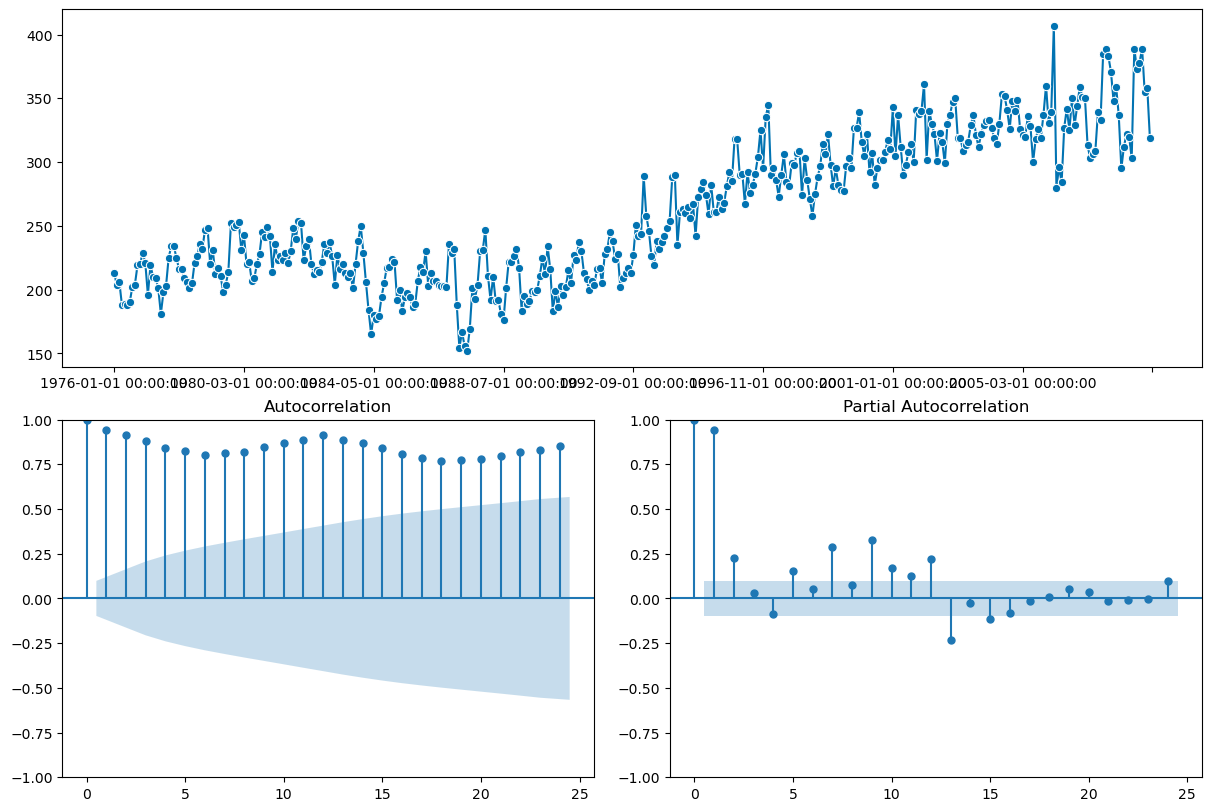

In [3]:
#
# Your code goes here 
#

# plots
plot_correlations(energy_ts)

# motivation of 12 month periodicity
# the autocorrelation plot shows a peak at 1 year, which is the periodicity of the data
# partial autocorrelation plot shows a peak at 1 year and 2 yeark, which show that consecutive years have the highest correlation in temperatures
# these are indicating that the data has a yearly periodicity
# futhermore by observing a data plot, we can see that the data has a yearly periodicity with a peak in the summer and a trough in the winter
# (This is due to the fact that the data is energy consumption data, which is dependent on temperature, and temperature has a yearly periodicity)

4. [10 points] Separate the trend, seasonal and residual noise components. Display each component separately. Display the residual noise as a scatter plot. From your interpretation of the residual plots, are there are cyclic, trend or seasonal effects which are unaccounted for?
Points breakdown: 3 points for separating the trend, 2 points for displaying each component. 3 points for the scatter plot, histogram plot of the residuals and 2 points for your intepreration.

Text(0.5, 1.0, 'Residual Noise')

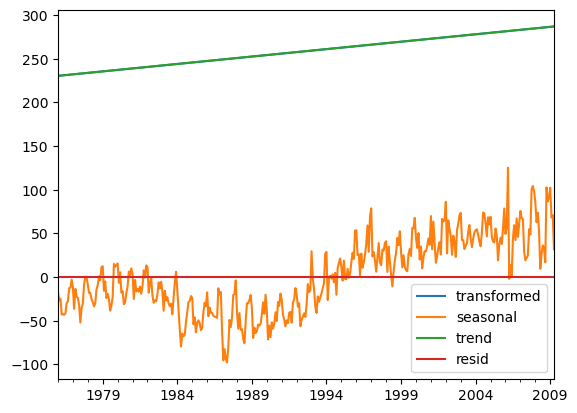

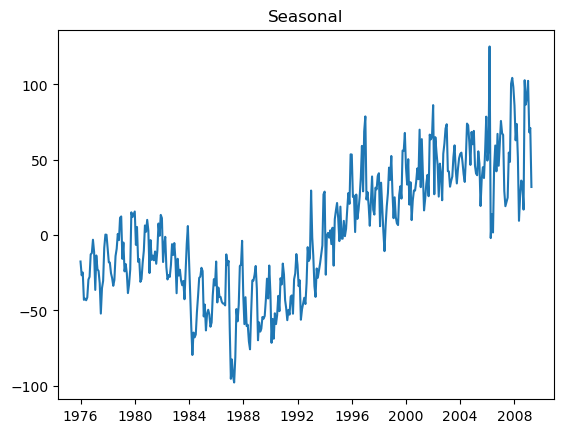

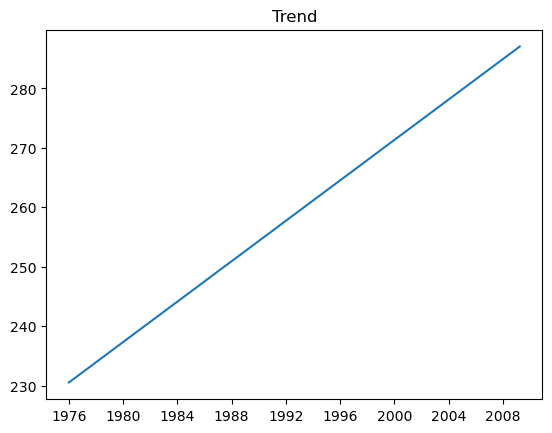

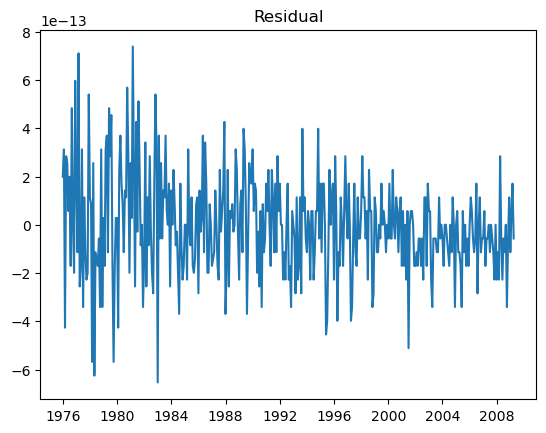

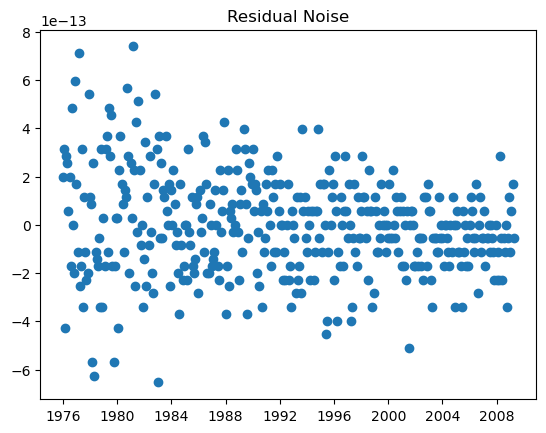

In [7]:
#
# Your code goes here 
#

# Separate the trend, seasonal and residual noise components
from sktime.transformations.series.detrend import STLTransformer
transformer = STLTransformer(sp=365, return_components=True)
result =  transformer.fit_transform(energy_ts)
result.plot()

# Display each component separately
plt.figure()
plt.plot(result.seasonal)
plt.title("Seasonal")
plt.figure()
plt.plot(result.trend)
plt.title("Trend")
plt.figure()
plt.plot(result.resid)
plt.title("Residual")

# Display residual noise as scatter plot
plt.figure()
plt.scatter(result.index, result.resid)
plt.title("Residual Noise")

# From your interpretation of the residual plots, are there are cyclic, trend or seasonal effects which are unaccounted for?
# There are no cyclic effects unaccounted for, as the residual plot shows no cyclic pattern


4. [4 points]  This question is on time series forecasting with ARIMA
* Split the time series into a train, validation and test set. Set the forecasting horizon of the validation set to be 60 months and the test set to 60 months (2 points)
* Fit an ARIMA or SARIMA model on the training set. Find the optimal p,d and q values for ARIMA (by evaluating the mean absolute percentage error on the validation set). Chose at least 3 different values for p and 2 different values for d and q. (6 points)
* With the best p,d and q values you found, fit an ARIMA model on the combined train and validation set. Evaluate your model on the test set by computing the mean absolute percentage error.(6 points)
* Display the train, validation, test set and your predicted solution Label your plot. (1 point)

In [24]:
from sktime.forecasting.arima import ARIMA
from sktime.performance_metrics.forecasting import MeanSquaredError
from sktime.utils.plotting import plot_series
from sktime.split import temporal_train_test_split

# 1

# Split the time series into a train, validation and test set
y_train, y_test = temporal_train_test_split(energy_ts, test_size=60)
y_train, y_val = temporal_train_test_split(y_train, test_size=60)

'''
# split to x and y
x_train = train.index
y_train = train.values
x_val = val.index
y_val = val.values
x_test = test.index
y_test = test.values
'''

'''
# Convert numpy arrays to pandas Series
y_train_series = pd.Series(y_train, index=y_train)
y_pred_series = pd.Series(y_val, index=y_val)  # use validation index for predicted values
y_test_series = pd.Series(y_test, index=y_test)
'''

'''
# Set the forecasting horizon of the validation set to be 60 months and the test set to 60 months
fh_val = np.arange(1, x_val.shape[0] + 1)
fh_test = np.arange(1, x_test.shape[0] + 1)
'''

# 2
# Fit an ARIMA or SARIMA model on the training set.
forecaster = ARIMA(order=(5, 1, 1), suppress_warnings=True)
forecaster.fit(y=y_train)
y_pred = forecaster.predict(fh=fh)

plot_series(y_train, y_pred, y_test, labels=["y_train", "y_pred", "y_test"])
# plot_series(y_train, y_pred, y_test, labels=["y_train", "y_pred", "y_val"])
mse = MeanSquaredError(square_root=True)
print(mse(y_test, y_pred))

# Find the optimal p,d and q values for ARIMA (by evaluating the mean absolute percentage error on the validation set). 
# Chose at least 3 different values for p and 2 different values for d and q.


ValueError: MS is not supported as period frequency

/tmp/ipykernel_1707/2376656209.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  energy_ts = energy_ts.resample('M').mean()


41.75239593267927


/home/danaconda/miniconda3/envs/ima/lib/python3.12/site-packages/sktime/forecasting/base/_fh.py:415: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  if freq_from_self != freq_from_obj:
/home/danaconda/miniconda3/envs/ima/lib/python3.12/site-packages/sktime/forecasting/base/_fh.py:172: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return to_offset(obj)
/home/danaconda/miniconda3/envs/ima/lib/python3.12/site-packages/sktime/forecasting/base/_fh.py:415: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  if freq_from_self != freq_from_obj:
/home/danaconda/miniconda3/envs/ima/lib/python3.12/site-packages/sktime/forecasting/base/_fh.py:172: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return to_offset(obj)
/home/danaconda/miniconda3/envs/ima/lib/python3.12/site-packages/sktime/util

'\n# step 5: querying predictions\ny_temp = forecaster.predict(fh=fh)\n\ny_pred = y_test.copy()\ny_pred[\'Temp\'] = y_temp\n\nplot_series(y_train, y_pred, y_test, labels=["y_train", "y_pred", "y_test"])\n\ntraining_score = forecaster.score(y=y_test.values,fh=fh)\nprint(training_score)\n\nprint(y_train.dtypes)\nmse = MeanSquaredError()\nprint(mse(y_test, y_pred))\n\nmse = MeanSquaredError(square_root=True)\nprint(mse(y_test, y_pred))\n\n'

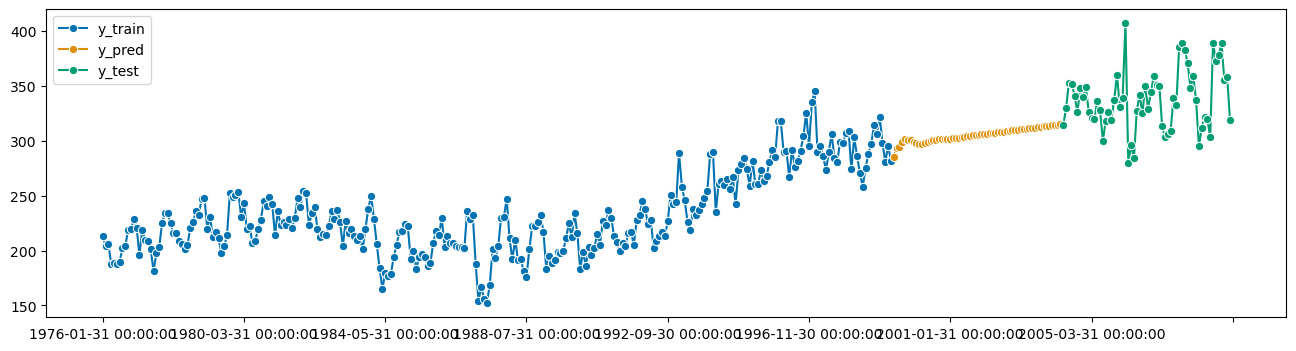

In [27]:
from sktime.forecasting.naive import NaiveForecaster
from sktime.forecasting.model_evaluation import evaluate
from sktime.split import temporal_train_test_split
from sktime.utils.plotting import plot_series
from sktime.performance_metrics.forecasting import median_absolute_percentage_error

energy_ts = energy_ts.resample('M').mean()
tst_size = 60

# Load data
# temperatures = pd.read_csv(join('data', 'daily-minimum-temperatures.csv'), header=0, index_col=0, parse_dates=True)

# we will try to forecast y_test from y_train

# Split data
y_train, y_test = temporal_train_test_split(energy_ts, test_size=tst_size)
y_train, y_val = temporal_train_test_split(y_train, test_size=tst_size)

# Specifying forecasting horizon
fh = np.arange(1, tst_size+1)

# Specifying the forecasting algorithm
#forecaster = NaiveForecaster(strategy="last")

# Fitting the forecaster
#forecaster.fit(y_train.values)

forecaster = ARIMA(order=(5, 1, 1), suppress_warnings=True)
forecaster.fit(y=y_train)
y_pred = forecaster.predict(fh=fh)
plot_series(y_train, y_pred, y_test, labels=["y_train", "y_pred", "y_test"])
mse = MeanSquaredError(square_root=True)
print(mse(y_test, y_pred))

'''
# step 5: querying predictions
y_temp = forecaster.predict(fh=fh)

y_pred = y_test.copy()
y_pred['Temp'] = y_temp

plot_series(y_train, y_pred, y_test, labels=["y_train", "y_pred", "y_test"])

training_score = forecaster.score(y=y_test.values,fh=fh)
print(training_score)

print(y_train.dtypes)
mse = MeanSquaredError()
print(mse(y_test, y_pred))

mse = MeanSquaredError(square_root=True)
print(mse(y_test, y_pred))

'''


In [15]:
from sktime.split import temporal_train_test_split
from sktime.performance_metrics.forecasting import MeanSquaredError

fh = np.arange(1, tst_size+1)
tst_size = 60
# step 1: data specification
y_train, y_test = temporal_train_test_split((energy_ts), test_size=tst_size)


p_values = [4, 8, 12, 16]
d_values = range(0, 2)
q_values = range(0, 4)
best_score, best_cfg = float("inf"), None

for p in p_values:
    for d in d_values:
        for q in q_values:
            arima_order=(p,d,q)
            try:
                forecaster = ARIMA(order=arima_order, suppress_warnings=True)
                forecaster.fit(y_train)
                y_pred = forecaster.predict(fh=fh)

                mse = MeanSquaredError(square_root=True)
                rmse =  mse(y_test, y_pred)
                if rmse < best_score:
                    best_score, best_cfg = rmse, arima_order
                    print('ARIMA%s RMSE=%.3f' % (arima_order,rmse))
            except:
                continue

print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

Best ARIMANone RMSE=inf


5. (7 points) This question is on time series regression with K-Nearest Neighbour using the sklearn or sktime package.
* Split the time series into a train and test set. Set of the test set to 60 month. Using `GridSearchCV`, train a KNN regessor with a 5-fold cross validation. Find the best regularization (nearest neighbour) hyperparameter with 5 different neighbour values. (3 points)
* Using the best hyperparameter found from grid search on the training set, evaluate the mean absolute percentage error on the test set. (When you call grid search.fit, the best hyperparameter is automatically found and stored in grid search). (3 points)
* Display the train, validation, test set and your predicted solution. Label your plot. (1 point)

In [ ]:
#
# Your code goes here 
#